In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
df = pd.read_csv('RV_dataset.csv', index_col=0)
df.head()

,.SPX,.GDAXI,.FCHI,.FTSE,.OMXSPI,.N225,.KS11,.HSI
0,0.005256,0.005322,0.005244,0.004577,0.005303,0.006352,0.004162,0.003382
1,0.005144,0.004198,0.004752,0.003604,0.004506,0.005755,0.004880,0.003169
2,0.004797,0.004633,0.005409,0.005985,0.005042,0.005430,0.005316,0.004018
3,0.005760,0.007076,0.007345,0.005245,0.005927,0.008043,0.006044,0.005876
4,0.005093,0.005453,0.005685,0.005473,0.005393,0.008035,0.004904,0.005339


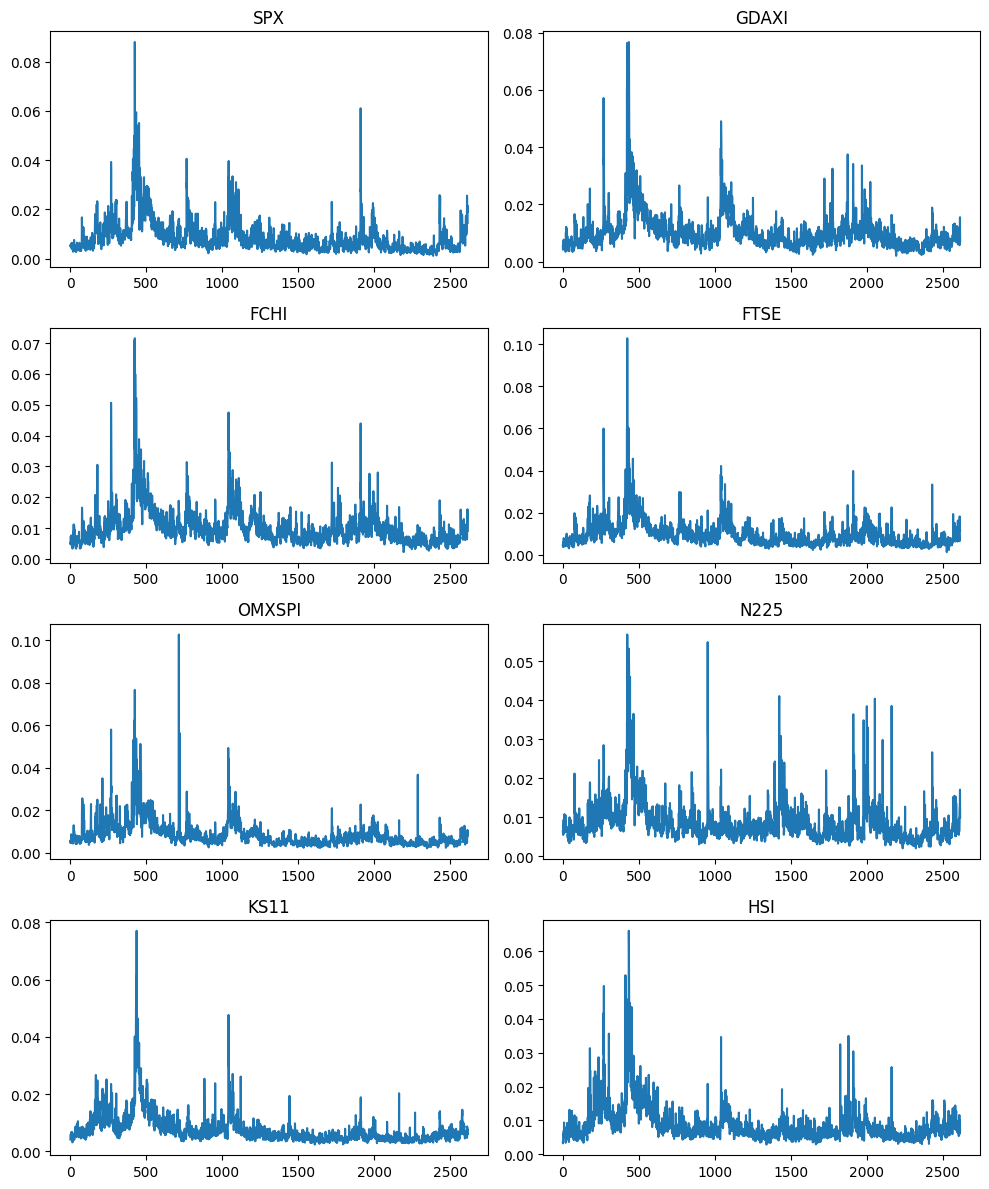

In [21]:

num_cols = 2
num_rows = math.ceil(len(df.columns) / num_cols) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 3))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].plot(df.index, df[col], linestyle='-')
    axes[i].set_title(col[1:])  

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()